In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [33]:
gamma = 1.0
amp = 5.0*gamma

def accumulatedPhaseFunc_sin(amp, freq, phase, t):
    """
    The accumulated phase from periodic modulation.
    """
    #return amp*np.sin(freq*t + phase)
    # return np.exp(-1.0j*(freq*2*np.pi*t + phase))
    return np.exp(1.0j*amp/freq*(np.cos(freq*t + phase) - 1))

def accumulatedPhaseFunc_multiSin(amps: np.array, freqs: np.array, phases: np.array, t: float) -> complex:
    """
    The accumulated phase from periodic modulation.
    """
    globalPhase = np.pi/2
    modulationInte = 0.0
    for ii in range(amps.size):
        modulationInte = modulationInte + amps[ii]/freqs[ii]*(np.cos(freqs[ii]*t + phases[ii] + globalPhase) - np.cos(phases[ii] + globalPhase))
    return np.exp(1.0j*modulationInte)

In [18]:
# Test single-frequency modulations
numSample = 1000
numPeriod = 10.0
inputFreq = np.linspace(-15.0*gamma, 15.0*gamma, 1000)

# fast modulation
Omega_fast = 10.0*gamma
period_fast = 2*np.pi/Omega_fast
t_fast = np.linspace(0, numPeriod*period_fast, numSample)
expDelta_fast = accumulatedPhaseFunc_sin(amp, Omega_fast, 0.0, t_fast)
spectrum_fast = np.fft.fftshift((np.fft.fft(expDelta_fast)))/len(t_fast)

# freqAxis = np.arange(numSample)
# plt.figure()
# plt.plot(t, np.abs(expDelta))
# plt.figure()
# plt.plot(freqAxis[400:600], (np.abs(spectrum)**2)[400:600])

# store all the Fourier components
fourierComp_fast = []
for ii in range(int(numSample/numPeriod)):
    # print(int(numPeriod)*ii)
    fourierComp_fast.append(spectrum_fast[int(numPeriod)*ii])
# print(len(fourierComp))
# fourierComp

# calculate the transmission
rangeInc_fast = 5
transmission_fast = []
for nu in inputFreq:
    Snu = 0.0
    for p in range(-2*rangeInc_fast, 2*rangeInc_fast):
        Sp = 0.0 + 0.0j
        for n in range(-rangeInc_fast, rangeInc_fast):
            alpha_n = np.conjugate(fourierComp_fast[50 + n])
            alpha_pn = 0.0 + 0.0j
            if ((n + p) <= 49) and ((n + p) >= -50):
                alpha_pn = fourierComp_fast[50 + n + p]
            Spn = -np.sqrt(gamma/2)*alpha_n*alpha_pn/(1.0j*(n*Omega_fast - nu) + gamma/2)
            Sp += Spn
        Snu += np.abs(Sp)**2
    transmission_fast.append(Snu)
print("Fast finished.")
    
# medium modulation
Omega_med = 2.5*gamma
period_med = 2*np.pi/Omega_med
t_med = np.linspace(0, numPeriod*period_med, numSample)
expDelta_med = accumulatedPhaseFunc_sin(amp, Omega_med, 0.0, t_med)
spectrum_med = np.fft.fftshift((np.fft.fft(expDelta_med)))/len(t_med)

fourierComp_med = []
for ii in range(int(numSample/numPeriod)):
    fourierComp_med.append(spectrum_med[int(numPeriod)*ii])

rangeInc_med = 5
transmission_med = []
for nu in inputFreq:
    Snu = 0.0
    for p in range(-2*rangeInc_med, 2*rangeInc_med):
        Sp = 0.0 + 0.0j
        for n in range(-rangeInc_med, rangeInc_med):
            alpha_n = np.conjugate(fourierComp_med[50 + n])
            alpha_pn = 0.0 + 0.0j
            if ((n + p) <= 49) and ((n + p) >= -50):
                alpha_pn = fourierComp_med[50 + n + p]
            Spn = -np.sqrt(gamma/2)*alpha_n*alpha_pn/(1.0j*(n*Omega_med - nu) + gamma/2)
            Sp += Spn
        Snu += np.abs(Sp)**2
    transmission_med.append(Snu)

print("Medium finished.")

# slow modulation
Omega_slow = 0.25*gamma
period_slow = 2*np.pi/Omega_slow
t_slow = np.linspace(0, numPeriod*period_slow, numSample)
expDelta_slow = accumulatedPhaseFunc_sin(amp, Omega_slow, 0.0, t_slow)
spectrum_slow = np.fft.fftshift((np.fft.fft(expDelta_slow)))/len(t_slow)

fourierComp_slow = []
for ii in range(int(numSample/numPeriod)):
    fourierComp_slow.append(spectrum_slow[int(numPeriod)*ii])

rangeInc_slow = 25
transmission_slow = []
for nu in inputFreq:
    Snu = 0.0
    for p in range(-2*rangeInc_slow, 2*rangeInc_slow):
        Sp = 0.0 + 0.0j
        for n in range(-rangeInc_slow, rangeInc_slow):
            alpha_n = np.conjugate(fourierComp_slow[50 + n])
            alpha_pn = 0.0 + 0.0j
            if ((n + p) <= 49) and ((n + p) >= -50):
                alpha_pn = fourierComp_slow[50 + n + p]
            Spn = -np.sqrt(gamma/2)*alpha_n*alpha_pn/(1.0j*(n*Omega_slow - nu) + gamma/2)
            Sp += Spn
        Snu += np.abs(Sp)**2
    transmission_slow.append(Snu)

print("Slow finished.")

Fast finished.
Medium finished.
Slow finished.


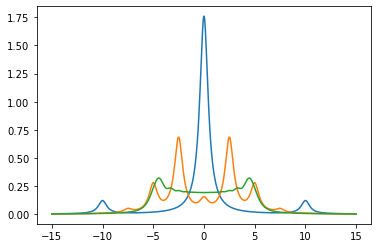

In [20]:
plt.figure()
plt.plot(inputFreq, transmission_fast)
plt.plot(inputFreq, transmission_med)
plt.plot(inputFreq, transmission_slow)

In [34]:
# Test four-color design
inputFreq = np.linspace(-150.0*gamma, 150.0*gamma, 1000)
basicFreq = 1200/98.0
amps_4f = np.array([2360.0/98.0, 2110.0/98.0, 2220.0/98.0, 2020.0/98.0, 2250.0/98.0])
phases_4f = np.array([np.pi/6, -np.pi/6, np.pi/2, -5*np.pi/6, 5*np.pi/6])
freqs_4f = basicFreq*np.array([1, 2, 3, 4, 5])
period_4f = 2.0*np.pi/basicFreq
t_4f = np.linspace(0, numPeriod*period_4f, numSample)
expDelta_4f = accumulatedPhaseFunc_multiSin(amps_4f, freqs_4f, phases_4f, t_4f)
spectrum_4f = np.fft.fftshift((np.fft.fft(expDelta_4f)))/len(t_4f)

# freqAxis = np.arange(numSample)
# plt.figure()
# plt.plot(freqAxis, (np.abs(spectrum_4f)**2))

fourierComp_4f = []
for ii in range(int(numSample/numPeriod)):
    fourierComp_4f.append(spectrum_4f[int(numPeriod)*ii])

rangeInc_4f = 12
transmission_4f = []
for nu in inputFreq:
    Snu = 0.0
    for p in range(-2*rangeInc_4f, 2*rangeInc_4f):
        Sp = 0.0 + 0.0j
        for n in range(-rangeInc_4f, rangeInc_4f):
            alpha_n = np.conjugate(fourierComp_4f[50 + n])
            alpha_pn = 0.0 + 0.0j
            if ((n + p) <= 49) and ((n + p) >= -50):
                alpha_pn = fourierComp_4f[50 + n + p]
            Spn = -np.sqrt(gamma/2)*alpha_n*alpha_pn/(1.0j*(n*basicFreq - nu) + gamma/2)
            Sp += Spn
        Snu += np.abs(Sp)**2
    transmission_4f.append(Snu)

Use cosine functions:


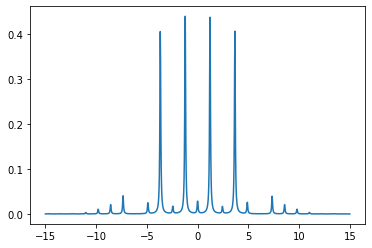

In [38]:
print("Use cosine functions:")
plt.figure()
plt.plot(inputFreq/10, transmission_4f)

Use sine functions:


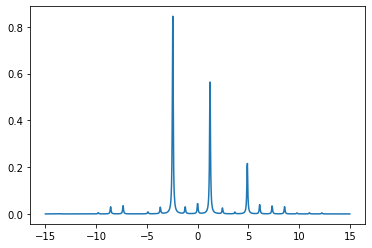

In [40]:
def accumulatedPhaseFunc_multiSin2(amps: np.array, freqs: np.array, phases: np.array, t: float) -> complex:
    """
    The accumulated phase from periodic modulation.
    """
    globalPhase = 0.0
    modulationInte = 0.0
    for ii in range(amps.size):
        modulationInte = modulationInte + amps[ii]/freqs[ii]*(np.cos(freqs[ii]*t + phases[ii] + globalPhase) - np.cos(phases[ii] + globalPhase))
    return np.exp(1.0j*modulationInte)

inputFreq = np.linspace(-150.0*gamma, 150.0*gamma, 1000)
basicFreq = 1200/98.0
amps_4f = np.array([2360.0/98.0, 2110.0/98.0, 2220.0/98.0, 2020.0/98.0, 2250.0/98.0])
phases_4f = np.array([np.pi/6, -np.pi/6, np.pi/2, -5*np.pi/6, 5*np.pi/6])
freqs_4f = basicFreq*np.array([1, 2, 3, 4, 5])
period_4f = 2.0*np.pi/basicFreq
t_4f = np.linspace(0, numPeriod*period_4f, numSample)
expDelta_4f = accumulatedPhaseFunc_multiSin2(amps_4f, freqs_4f, phases_4f, t_4f)
spectrum_4f = np.fft.fftshift((np.fft.fft(expDelta_4f)))/len(t_4f)

# freqAxis = np.arange(numSample)
# plt.figure()
# plt.plot(freqAxis, (np.abs(spectrum_4f)**2))

fourierComp_4f = []
for ii in range(int(numSample/numPeriod)):
    fourierComp_4f.append(spectrum_4f[int(numPeriod)*ii])

rangeInc_4f = 12
transmission_4f = []
for nu in inputFreq:
    Snu = 0.0
    for p in range(-2*rangeInc_4f, 2*rangeInc_4f):
        Sp = 0.0 + 0.0j
        for n in range(-rangeInc_4f, rangeInc_4f):
            alpha_n = np.conjugate(fourierComp_4f[50 + n])
            alpha_pn = 0.0 + 0.0j
            if ((n + p) <= 49) and ((n + p) >= -50):
                alpha_pn = fourierComp_4f[50 + n + p]
            Spn = -np.sqrt(gamma/2)*alpha_n*alpha_pn/(1.0j*(n*basicFreq - nu) + gamma/2)
            Sp += Spn
        Snu += np.abs(Sp)**2
    transmission_4f.append(Snu)
    
print("Use sine functions:")
plt.figure()
plt.plot(inputFreq/10, transmission_4f)